# Time Series Analysis - NYPD Shooting Incident Data

Following code is part of an assignment for the course IMSE 586 - Big Data Analytics and Visualization at the University of Michigan at Dearborn.

Download the data from the following link: https://data.cityofnewyork.us/Public-Safety/NYPD-Shooting-Incident-Data-Historic-/833y-fsy8

You can find the CSV file by first clicking the 'Export' button on the webpage, and then clicking 'CSV'.

Read the descriptions of the dataset on the webpage. 

Like all previous homework, make sure you include the data file in your submission package. 

Read the data into a pandas dataframe. Do the normal checking on the dataframe, and then do the following.

1. Use the pandas `to_datetime` function to create a new column called `datetime` that include the complete date and time information of each shooting incident. Then set this column as the index of the dataframe. Then sort the incidents in chronological order (i.e., with the latest incidents at the bottom. Hint: check pandas function `sort_index`). Lastly, print the first few rows of the dataframe. 


2. Create a new column in the dataframe that shows the incident's day of the week in abbreviated names (e.g., Mon, Tue). Print the first few rows of the dataframe to show the new column. 


3. From the year 2014 to 2018 (both inclusive), what is the percentage of the shooting incidents that resulted in the victim’s death? Keep your answer in two decimal places, for example, 0.34, or 34%.  


4. Resample the data to show the **weekly** counts of the shooting incidents. Make a time series line plot that shows how the weekly counts of shooting incidents change over time. Hint: A handy way to plot this is to first select the column that you want to plot, then simply add `.plot()` at the end. Make sure to choose a suitable aspect ratio of your figure (e.g., 15-by-5), include important elements (e.g., x & y labels, title) and make the plot easy to read (e.g., larger fonts). Same requirements for all the following plots. 


5. Do the same thing as in Q4 above, but for **monthly** counts. 


6. Do the same thing as in Q4 above, but for **yearly** counts. Since there would be only a few data points, add markers in the line plot. Make sure the marker is easily visible. You can check the following link on how to customize markers.  https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.plot.html


7. Use pandas `crosstab` function to create a line plot that shows how the shooting incident counts change month by month for each year. That is, there should be one line for each year, and the x-axis is the 12 months. 

    * Print the crosstab table.
    
    * Use the calendar library to get the abbreviated month names (e.g., Jan, Feb) and use them as the xticks label. (Google how to get the abbreviated month names!)


8. Again, use the `crosstab` function to create a cross tabulation with one dimension grouped by the five boroughs in NYC, and the other dimension grouped by year and month. Create a jitter plot that shows the monthly counts of shooting incidents in the five boroughs.

    * Print the crosstab table.
    
    * Adjust the jitter plot to avoid overplotting and improve the aesthetic.


9. Again, use the `crosstab` function to create a cross tabulation with one dimension grouped by day of week (use the column we created in Q2), and the other dimension grouped by year and month. Create a jitter plot that shows how the monthly counts of shooting incidents change in different days of week.

    * Print the crosstab table.
    
    * In the plot, make sure to show the day of week in order from Sun, Mon, ... to Sat. Hint: you may create a list of the order and pass that to an argument of the `stripplot` function. 
    
    * Adjust the jitter plot to avoid overplotting and improve the aesthetic.
    
    * Add a boxplot to the jitter plot, and set at least the following: set the `color` argument to white (`'w'`), completely remove the markers used to indicate outliers. You can keep the whiskers. 
    

10. **No need to answer this question**. Just check in question 4-6, do you see unique information from the weekly, monthly, and yearly plots?


11. **No need to answer this question**. If you are interested, you can do something similar to Q9 to check which hours of the day have the most and the least shooting in NYC. Any guesses before you plot it?

In [9]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('NYPD_Shooting_Incident_Data__Historic_.csv')
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,169180023,09/09/2017,3:57:00,STATEN ISLAND,120,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,959975,171772,40.638126,-74.087467
1,169180027,09/09/2017,22:15:00,BRONX,50,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK HISPANIC,1011288,255912,40.869061,-73.902242
2,169180025,09/09/2017,18:35:00,BROOKLYN,79,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,18-24,M,BLACK,999888,193014,40.696450,-73.943607
3,169180024,09/09/2017,15:20:00,BROOKLYN,67,0.0,NaN,False,18-24,M,BLACK,18-24,M,BLACK,997784,172132,40.639137,-73.951236
4,169180022,09/09/2017,0:20:00,BROOKLYN,61,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,25-44,M,ASIAN / PACIFIC ISLANDER,1001019,156467,40.596134,-73.939619


In [11]:
df.shape

(22375, 18)

In [12]:
df.dtypes

INCIDENT_KEY                 int64
OCCUR_DATE                  object
OCCUR_TIME                  object
BORO                        object
PRECINCT                     int64
JURISDICTION_CODE          float64
LOCATION_DESC               object
STATISTICAL_MURDER_FLAG       bool
PERP_AGE_GROUP              object
PERP_SEX                    object
PERP_RACE                   object
VIC_AGE_GROUP               object
VIC_SEX                     object
VIC_RACE                    object
X_COORD_CD                  object
Y_COORD_CD                  object
Latitude                   float64
Longitude                  float64
dtype: object

In [13]:
df.isnull().sum()

INCIDENT_KEY                   0
OCCUR_DATE                     0
OCCUR_TIME                     0
BORO                           0
PRECINCT                       0
JURISDICTION_CODE              3
LOCATION_DESC              12865
STATISTICAL_MURDER_FLAG        0
PERP_AGE_GROUP              7666
PERP_SEX                    7632
PERP_RACE                   7632
VIC_AGE_GROUP                  0
VIC_SEX                        0
VIC_RACE                       0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
dtype: int64

### 1. Use the pandas `to_datetime` function to create a new column called `datetime` that include the complete date and time information of each shooting incident. Then set this column as the index of the dataframe. Then sort the incidents in chronological order (i.e., with the latest incidents at the bottom. Hint: check pandas function `sort_index`). Lastly, print the first few rows of the dataframe. 

In [14]:
df['newdatetime'] = df.OCCUR_DATE + ' ' + df.OCCUR_TIME

df['datetime'] = pd.to_datetime(df.newdatetime, format = '%m/%d/%Y %H:%M:%S')

df.set_index('datetime', inplace = True)

df.sort_index(inplace = True)

df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,newdatetime
datetime,,,,,,,,,,,,,,,,,,,
2006-01-01 02:00:00,9953245,01/01/2006,2:00:00,BRONX,48,0.0,NONE,False,18-24,M,BLACK,<18,M,BLACK,1013405,251801,40.857771,-73.894606,01/01/2006 2:00:00
2006-01-01 02:22:00,9953252,01/01/2006,2:22:00,MANHATTAN,28,0.0,NONE,True,25-44,M,BLACK,25-44,M,BLACK,998816,233545,40.807699,-73.947385,01/01/2006 2:22:00
2006-01-01 02:34:00,9953250,01/01/2006,2:34:00,QUEENS,114,0.0,BAR/NIGHT CLUB,True,18-24,M,BLACK,25-44,M,BLACK,1002577,221583,40.774860,-73.933832,01/01/2006 2:34:00
2006-01-01 02:34:00,9953250,01/01/2006,2:34:00,QUEENS,114,0.0,BAR/NIGHT CLUB,True,25-44,M,BLACK,25-44,M,BLACK,1002577,221583,40.774860,-73.933832,01/01/2006 2:34:00
2006-01-01 03:30:00,9953247,01/01/2006,3:30:00,BROOKLYN,67,0.0,NaN,False,UNKNOWN,U,UNKNOWN,18-24,M,BLACK,999316,176460,40.651014,-73.945707,01/01/2006 3:30:00


### 2. Create a new column in the dataframe that shows the incident's day of the week in abbreviated names (e.g., Mon, Tue). Print the first few rows of the dataframe to show the new column. 

In [15]:
df['day_of_week'] = df.index.strftime('%a')

df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,newdatetime,day_of_week
datetime,,,,,,,,,,,,,,,,,,,,
2006-01-01 02:00:00,9953245,01/01/2006,2:00:00,BRONX,48,0.0,NONE,False,18-24,M,BLACK,<18,M,BLACK,1013405,251801,40.857771,-73.894606,01/01/2006 2:00:00,Sun
2006-01-01 02:22:00,9953252,01/01/2006,2:22:00,MANHATTAN,28,0.0,NONE,True,25-44,M,BLACK,25-44,M,BLACK,998816,233545,40.807699,-73.947385,01/01/2006 2:22:00,Sun
2006-01-01 02:34:00,9953250,01/01/2006,2:34:00,QUEENS,114,0.0,BAR/NIGHT CLUB,True,18-24,M,BLACK,25-44,M,BLACK,1002577,221583,40.774860,-73.933832,01/01/2006 2:34:00,Sun
2006-01-01 02:34:00,9953250,01/01/2006,2:34:00,QUEENS,114,0.0,BAR/NIGHT CLUB,True,25-44,M,BLACK,25-44,M,BLACK,1002577,221583,40.774860,-73.933832,01/01/2006 2:34:00,Sun
2006-01-01 03:30:00,9953247,01/01/2006,3:30:00,BROOKLYN,67,0.0,NaN,False,UNKNOWN,U,UNKNOWN,18-24,M,BLACK,999316,176460,40.651014,-73.945707,01/01/2006 3:30:00,Sun


### 3. From the year 2014 to 2018 (both inclusive), what is the percentage of the shooting incidents that resulted in the victim’s death? Keep your answer in two decimal places, for example, 0.34, or 34%. 

In [16]:
x = df['2014' : '2018']
perc_murder = len(x[x.STATISTICAL_MURDER_FLAG == True])/len(x)
print('The percentage of the shooting incidents that resulted in the victim''s death is', round(perc_murder, 2))

The percentage of the shooting incidents that resulted in the victims death is 0.19


### 4. Resample the data to show the **weekly** counts of the shooting incidents. Make a time series line plot that shows how the weekly counts of shooting incidents change over time. 

In [17]:
df.resample('W').count().head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,newdatetime,day_of_week
datetime,,,,,,,,,,,,,,,,,,,,
2006-01-01,8,8,8,8,8,8,7,8,7,7,7,8,8,8,8,8,8,8,8,8
2006-01-08,26,26,26,26,26,26,20,26,23,25,25,26,26,26,26,26,26,26,26,26
2006-01-15,34,34,34,34,34,34,27,34,32,34,34,34,34,34,34,34,34,34,34,34
2006-01-22,37,37,37,37,37,37,28,37,34,37,37,37,37,37,37,37,37,37,37,37
2006-01-29,19,19,19,19,19,19,13,19,18,19,19,19,19,19,19,19,19,19,19,19


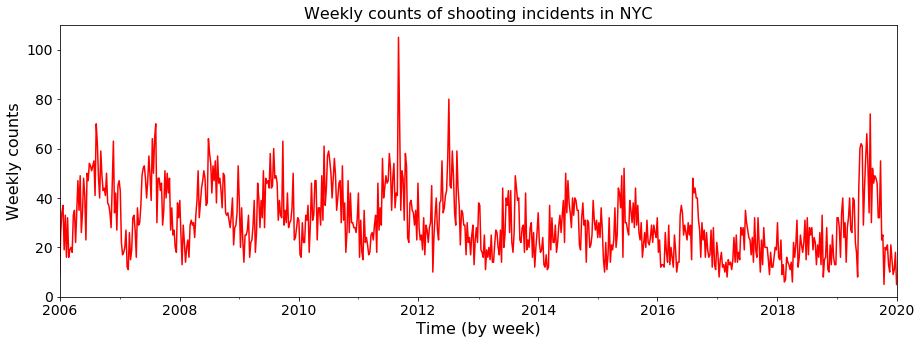

In [18]:
plt.figure(figsize = (15, 5))

df.resample('W').count().INCIDENT_KEY.plot(color = 'red') 

plt.xlabel('Time (by week)', fontsize = 16)
plt.ylabel('Weekly counts', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Weekly counts of shooting incidents in NYC', fontsize = 16)

plt.show()

### 5. Do the same thing as in Q4 above, but for **monthly** counts. 

In [22]:
df.resample('M').count().head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,newdatetime,day_of_week
datetime,,,,,,,,,,,,,,,,,,,,
2006-01-31,129,129,129,129,129,129,100,129,119,127,127,129,129,129,129,129,129,129,129,129
2006-02-28,97,97,97,97,97,97,61,97,84,96,96,97,97,97,97,97,97,97,97,97
2006-03-31,102,102,102,102,102,102,75,102,99,102,102,102,102,102,102,102,102,102,102,102
2006-04-30,156,156,156,156,156,156,93,156,148,156,156,156,156,156,156,156,156,156,156,156
2006-05-31,173,173,173,173,173,173,89,173,168,170,170,173,173,173,173,173,173,173,173,173


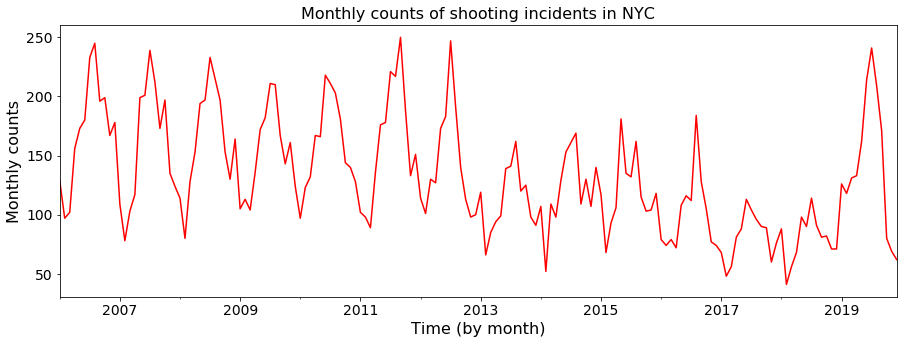

In [20]:
plt.figure(figsize = (15, 5))

df.resample('M').count().INCIDENT_KEY.plot(color = 'red') 

plt.xlabel('Time (by month)', fontsize = 16)
plt.ylabel('Monthly counts', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Monthly counts of shooting incidents in NYC', fontsize = 16)

plt.show()

### 6. Do the same thing as in Q4 above, but for **yearly** counts. Since there would be only a few data points, add markers in the line plot. Make sure the marker is easily visible. 

In [21]:
df.resample('Y').count().head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,newdatetime,day_of_week
datetime,,,,,,,,,,,,,,,,,,,,
2006-12-31,2055,2055,2055,2055,2055,2055,1054,2055,1890,1924,1924,2055,2055,2055,2055,2055,2055,2055,2055,2055
2007-12-31,1887,1887,1887,1887,1887,1886,865,1887,1606,1606,1606,1887,1887,1887,1887,1887,1887,1887,1887,1887
2008-12-31,1958,1958,1958,1958,1958,1958,910,1958,1736,1736,1736,1958,1958,1958,1958,1958,1958,1958,1958,1958
2009-12-31,1828,1828,1828,1828,1828,1828,852,1828,1637,1637,1637,1828,1828,1828,1828,1828,1828,1828,1828,1828
2010-12-31,1910,1910,1910,1910,1910,1910,917,1910,1211,1211,1211,1910,1910,1910,1910,1910,1910,1910,1910,1910


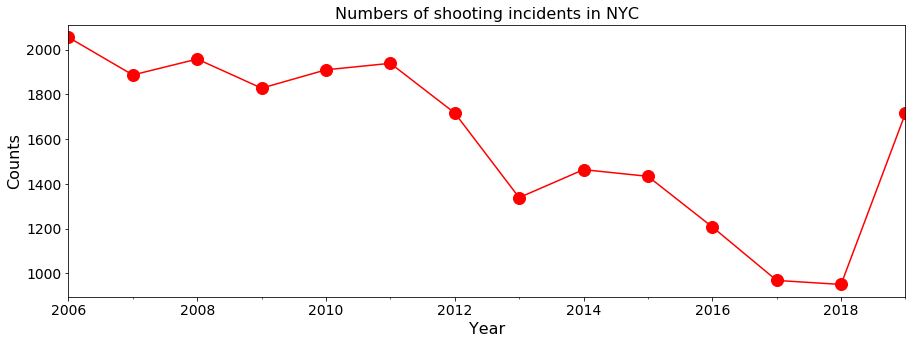

In [23]:
plt.figure(figsize = (15, 5))

df.resample('Y').count().INCIDENT_KEY.plot(color = 'red', marker = 'o', markersize = 12) 

plt.xlabel('Year', fontsize = 16)
plt.ylabel('Counts', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Numbers of shooting incidents in NYC', fontsize = 16)

plt.show()

### 7. Use pandas `crosstab` function to create a line plot that shows how the shooting incident counts change month by month for each year. That is, there should be one line for each year, and the x-axis is the 12 months. 

In [26]:
ctab = pd.crosstab(index = df.index.month, columns = df.index.year, rownames = ['month'], colnames = ['year'])
ctab

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
month,,,,,,,,,,,,,,
1,129,109,114,105,97,102,114,119,107,117,79,68,88,126
2,97,78,80,113,123,98,101,66,52,68,74,48,41,118
3,102,103,128,104,132,89,130,85,109,93,79,56,56,131
4,156,117,153,136,167,136,127,94,98,106,72,81,68,133
5,173,199,194,172,166,176,173,99,129,181,108,88,98,162
6,180,201,197,182,218,178,183,139,153,135,116,113,90,214
7,233,239,233,211,211,221,247,141,161,132,112,104,114,241
8,245,212,215,210,203,217,191,162,169,162,184,96,91,209
9,196,173,197,167,181,250,140,120,109,115,128,90,81,171


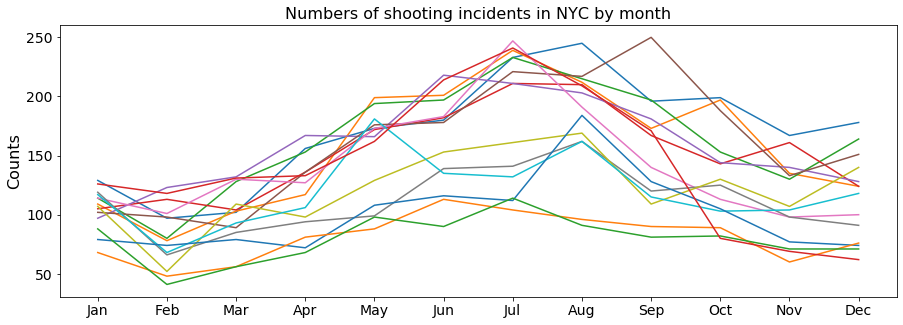

In [28]:
import calendar

fig = plt.figure(figsize = (15, 5))

plt.plot(ctab)

plt.xticks(np.arange(1, 13), calendar.month_abbr[1:13], fontsize = 14)

plt.ylabel('Counts', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Numbers of shooting incidents in NYC by month', fontsize = 16)

plt.show()

### 8. Again, use the `crosstab` function to create a cross tabulation with one dimension grouped by the five boroughs in NYC, and the other dimension grouped by year and month. Create a jitter plot that shows the monthly counts of shooting incidents in the five boroughs.

In [29]:
ctb = pd.crosstab(index = [df.index.year, df.index.month], columns = df.BORO, rownames = ['year', 'month'])
ctb.head(30)

BORO        BRONX  BROOKLYN  MANHATTAN  QUEENS  STATEN ISLAND
year month                                                   
2006 1         40        49         16      18              6
     2         22        34         16      23              2
     3         27        48         14       9              4
     4         46        54         20      29              7
     5         46        80         27      18              2
     6         40        83         32      24              1
     7         64        98         24      42              5
     8         61       116         30      32              6
     9         70        77         29      19              1
     10        60        62         30      34             13
     11        36        70         33      23              5
     12        56        79         17      25              1
2007 1         29        53         11      14              2
     2         19        43          9       5              2
     3         36        41         17       9              0
     4         27        47         17      23              3
     5         58        91         24      20              6
     6         55        80         34      30              2
     7         55       126         29      24              5
     8         77        75         26      24             10
     9         53        80         13      21              6
     10        58        83         17      34              5
     11        30        67         17      18              3
     12        36        47         19      16              6
2008 1         27        44         14      21              8
     2         25        33          9      12              1
     3         37        52          6      32              1
     4         47        53         21      26              6
     5         43        73         22      44             12
     6         62        66         33      34              2

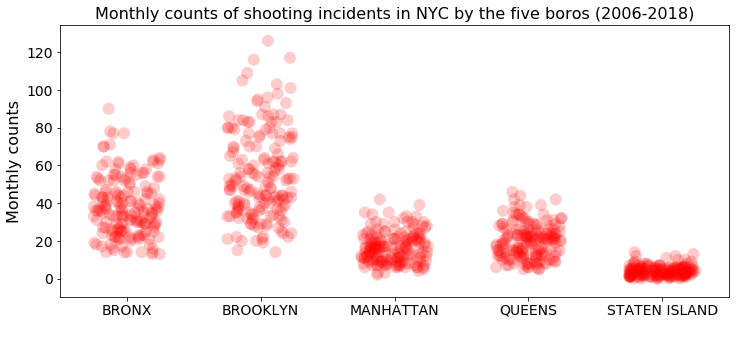

In [30]:
fig = plt.figure(figsize = (12, 5))

sns.stripplot(data = ctb, jitter = 0.25, alpha = .2, size = 12, color = 'r')

plt.xlabel(' ')
plt.ylabel('Monthly counts', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Monthly counts of shooting incidents in NYC by the five boros (2006-2018)', fontsize = 16)

plt.show()

### 9. Again, use the `crosstab` function to create a cross tabulation with one dimension grouped by day of week (use the column we created in Q2), and the other dimension grouped by year and month. Create a jitter plot that shows how the monthly counts of shooting incidents change in different days of week.

In [31]:
ctb = pd.crosstab(index = [df.index.year, df.index.month], columns = df.day_of_week, rownames = ['year', 'month'])
ctb.head(30)

day_of_week  Fri  Mon  Sat  Sun  Thu  Tue  Wed
year month                                    
2006 1        13   23   16   30   16   18   13
     2        18    6   19   21    6   12   15
     3        17   16   19   16   19    9    6
     4        27   22   30   30   20   14   13
     5        19   28   23   38   19   21   25
     6        30   26   27   31   17   20   29
     7        23   30   51   58   15   26   30
     8        31   37   37   56   29   30   25
     9        24   40   42   33   22   20   15
     10       25   45   20   46   18   25   20
     11        9   12   40   30   33    9   34
     12       25   20   30   39   18   33   13
2007 1        14   30   18   14    7   11   15
     2        10    6   18   13    9    7   15
     3        14   13   21   11   22    8   14
     4        13   22   21   26    9   13   13
     5        22   24   33   22   29   36   33
     6        30   15   57   32   18   20   29
     7        28   43   32   50   20   39   27
     8        28   14   50   48   31   16   25
     9        16   25   39   46   15   19   13
     10       23   21   47   38   18   27   23
     11       25    8   22   37   18   14   11
     12       12   31   16   41   12   11    1
2008 1        13   14   18   24   10   27    8
     2        20    5   19   14    6    8    8
     3        24   20   24   32    6   10   12
     4        16   14   36   25   22   27   13
     5        12   25   53   44   17   16   27
     6        20   29   43   33   17   24   31

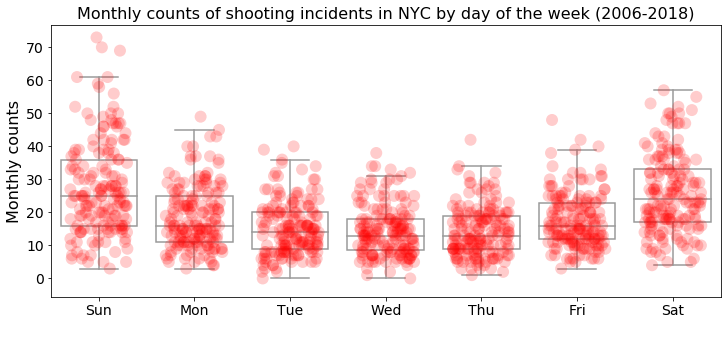

In [32]:
plt.figure(figsize = (12, 5))

order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

sns.stripplot(data = ctb, jitter = 0.3, alpha = .2, size = 12, color = 'r', order = order)

sns.boxplot(data = ctb, color = 'w', fliersize = 0, order = order)

plt.xlabel(' ')
plt.ylabel('Monthly counts', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Monthly counts of shooting incidents in NYC by day of the week (2006-2018)', fontsize = 16)

plt.show()